# TimML Notebook 4
## Horizontal well

A horizontal well is located in a 20 m thick aquifer; the hydraulic conductivity is $k = 10$ m/d and the vertical
anisotropy factor is 0.1. The horizontal well is placed 5 m above the bottom of the aquifer. The well has
a discharge of 10,000 m$^3$/d and radius of $r=0.2$ m. The well is 200 m long and runs from $(x, y) = (−100, 0)$
to $(x, y) = (100, 0)$. A long straight river with a head of 40 m runs to the right of the horizontal well along the line
$x = 200$. The head is fixed to 42 m at $(x, y) = (−1000, 0)$.

Three-dimensional flow to the horizontal well is modeled by dividing the aquifer up in 11 layers; the
elevations are: `[20, 15, 10, 8, 6, 5.5, 5.2, 4.8, 4.4, 4, 2, 0]`. At the depth of the well, the layer thickness is equal to
the diameter of the well, and it increases in the layers above and below the well. A TimML model is created with the Model3D
command. The horizontal well is located in layer 6 and is modeled with the `LineSinkDitch` element. Initially, the entry resistance of the well is set to zero.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from timml import *
figsize = (6, 6)

In [2]:
z = [20, 15, 10, 8, 6, 5.5, 5.2, 4.8, 4.4, 4, 2, 0]
ml = Model3D(kaq=10, z=z, kzoverkh=0.1)
ls1 = LineSinkDitch(ml, x1=-100, y1=0, x2=100, y2=0, Qls=10000, order=5, layers=6)
ls2 = HeadLineSinkString(ml, [(200, -1000), (200, -200), (200, 0), (200, 200), (200, 1000)], hls=40, order=5, layers=0)
rf = Constant(ml, xr=-1000, yr=0, hr=42, layer=0)

### Questions:
#### Exercise 4a
Solve the model.

In [3]:
ml.solve()

Number of elements, Number of equations: 3 , 31
...
solution complete


#### Exercise 4b
Create contour plots of layers 0 and 6 and note the difference between the layers. Also,
compute the head at $(x, y) = (0, 0.2)$ (on the edge of the well) and notice that there is a very large head
difference between the top of the aquifer and the well.

The head at the top and in layer 6 are:
[24.75875345 13.05844222]


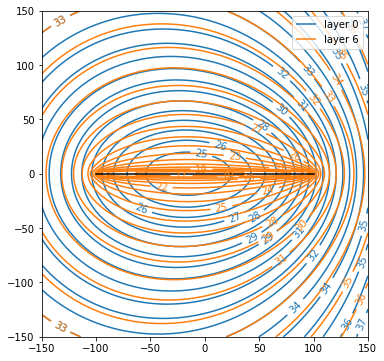

In [4]:
ml.contour(win=[-150, 150, -150, 150], ngr=[50, 100], layers = [0, 6],
           figsize=figsize)
print('The head at the top and in layer 6 are:')
print(ml.head(0, 0.2, [0, 6]))

#### Exercise 4c

Draw a number of pathlines from different elevations using the `tracelines` command. First make a plot with a cross section below it.  

...
...


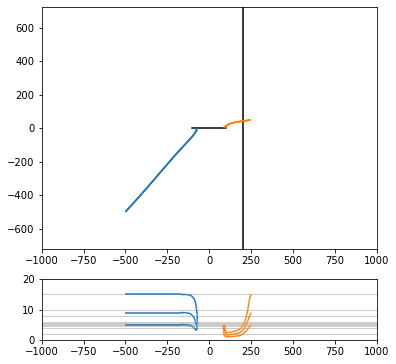

In [5]:
ml.plot(win=[-1000, 1000, -1000, 1000], orientation='both', figsize=figsize)
ml.tracelines(xstart=[-500, -500, -500], ystart=[-500, -500, -500], zstart=[5, 9, 15], 
              hstepmax=20, tmax=10 * 365.25, orientation='both', color='C0')
ml.tracelines(xstart=[250, 250, 250], ystart=[50, 50, 50], zstart=[5, 9, 15], 
              hstepmax=20, tmax=10 * 365.25, orientation='both', color='C1')

#### Exercise 4d
Make a contour plot of the heads in a vertical cross-section using the `vcontour` command. Use a cross-section along the well.

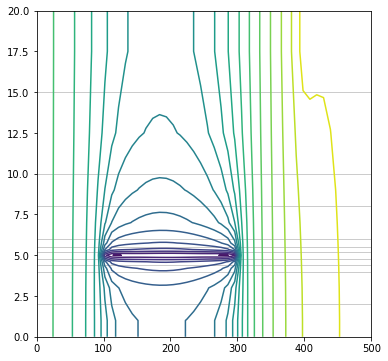

In [6]:
ml.vcontour(win=[-200, 300, 0, 0], n=50, levels=20, figsize=(6,6))

#### Exercise 4e
Change the entry resistance of the horizontal well to 0.01 days and set the width to 0.4 m and resolve the model. Notice the difference in the head inside the horizontal well with the `headinside` function of the horizontal well. Use a 

In [7]:
print('head inside w/o resistance:')
print(ls1.headinside())

head inside w/o resistance:
[12.11059184]


In [8]:
ml = Model3D(kaq=10, z=z, kzoverkh=0.1)
ls = LineSinkDitch(ml, x1=-100, y1=0, x2=100, y2=0, Qls=10000, order=5, layers=6, wh=0.4, res=0.01)
HeadLineSinkString(ml, [(200, -1000), (200, -200), (200, 0), (200, 200), (200, 1000)], 
                   hls=40, order=5, layers=0)
rf = Constant(ml, xr=-1000, yr=0, hr=42, layer=0)
ml.solve()

Number of elements, Number of equations: 3 , 31
...
solution complete


In [9]:
print('head inside horizontal well:', ls.headinside())

head inside horizontal well: [10.83813378]


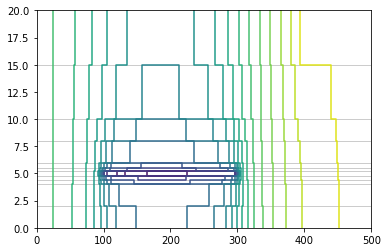

In [10]:
ml.vcontour(win=[-200, 300, 0, 0], n=50, levels=20, vinterp=False)

### Slanted well
A slanted well may be simulated by putting different sections in different layers

In [11]:
z = [20, 15, 10, 8, 6, 5.5, 5.2, 4.8, 4.4, 4, 2, 0]
ml = Model3D(kaq=10, z=np.linspace(20, 0, 21), kzoverkh=0.1)
rf = Constant(ml, 0, 1000, 20)
x = np.linspace(-200, 200, 21)
y = np.zeros(21)
ls = HeadLineSinkString(ml, xy=list(zip(x, y)), hls=10, layers=np.arange(0, 20, 1), order=0)
ml.solve()

Number of elements, Number of equations: 2 , 21
..
solution complete


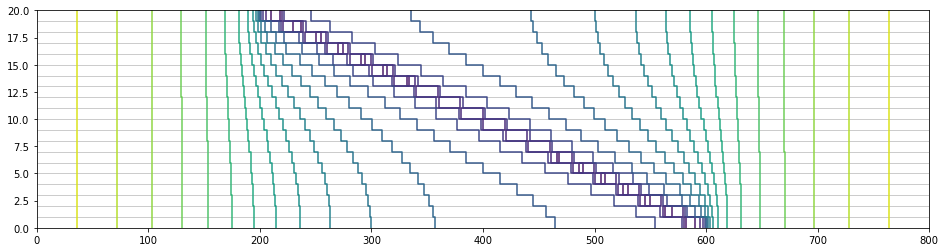

In [12]:
ml.vcontour(win=[-400, 400, 0, 0], n=200, levels=20, vinterp=False, figsize=(16, 4))

Note that the head is not exactly constant along the line-sink segments when using order 0

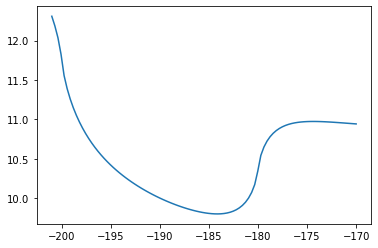

In [13]:
h = ml.headalongline(np.linspace(-201, -170, 100), 0)
plt.plot(np.linspace(-201, -170, 100), h[0])

In [14]:
Qtot = np.sum(ls.discharge())
print('Discharge of slanted well when modeled with fixed head hls=10:', Qtot)

Discharge of slanted well when modeled with fixed head hls=10: 4193.932634589962


In [15]:
z = [20, 15, 10, 8, 6, 5.5, 5.2, 4.8, 4.4, 4, 2, 0]
ml = Model3D(kaq=10, z=np.linspace(20, 0, 21), kzoverkh=0.1)
rf = Constant(ml, 0, 1000, 20)
x = np.linspace(-200, 200, 21)
y = np.zeros(21)
ls = LineSinkDitchString(ml, xy=list(zip(x, y)), Qls=Qtot, layers=np.arange(0, 20, 1), order=0)
ml.solve()

Number of elements, Number of equations: 2 , 21
..
solution complete


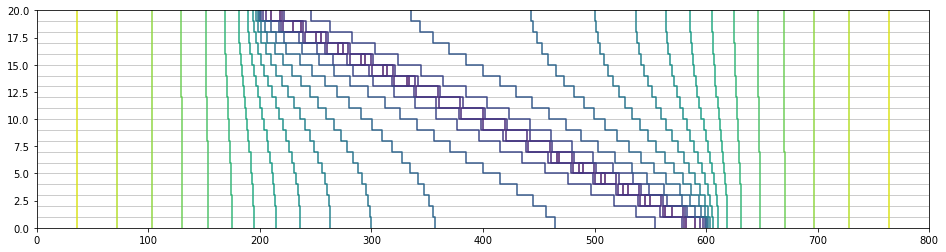

In [16]:
ml.vcontour(win=[-400, 400, 0, 0], n=200, levels=20, vinterp=False, figsize=(16, 4))

In [17]:
print('Head in slanted well when modeled with fixed discharge:')
[print(lspart.headinside()) for lspart in ls.lslist];

Head in slanted well when modeled with fixed discharge:
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
[10.]
